<a href="https://colab.research.google.com/github/Ruy8/RuyAramis_Mineria/blob/main/Equipo3_T%C3%A9cnicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Ejercicio técnicas de minería

# Minería de datos grupo 001 Lunes 

## Equipo 3:

- González Berumen Ricardo        1941497
- Gaytán Gutiérrez José Claudio   1855455
- López Verduzco Ruy Aramis       1863861
- Rodríguez Pacheco Nancy Janeth  1845816
- Ruiz Espitia Thalía             1941494

## Referencias

 El código presentado en este documento se hizo con la ayuda de las siguientes refenecias: 
-  https://pharos.sh/mineria-de-reglas-de-asociacion-a-traves-del-algoritmo-apriori-en-python/
-  https://www.jacobsoft.com.mx/es_mx/aprendizaje-con-reglas-de-asociacion/

```
# Esto tiene formato de código
```



## Reglas de asociación

Como objetivo principal se quiere encontrar en que momento del día se compran ciertos productos, así como también que productos van acompañados en las transacciones. 

Es por esto que se utilizaron reglas de asociación, para así conseguir los itemsets más repetidos

In [ ]:
pip install apyori

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
datos = pd.read_csv("bread_basket.csv")
print("Número de filas y columnas", datos.shape)
print("Nombre de las columnas", datos.columns)
columnas = datos.columns

Número de filas y columnas (20507, 5)
Nombre de las columnas Index(['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend'], dtype='object')


In [ ]:
datos.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [ ]:
transacciones = []
for i in range(0,20507):
  transacciones.append([str(datos.values[i,j]) for j in range(0,5)])

In [ ]:
from apyori import apriori
itemsets = apriori(transacciones, min_support = 0.005, min_confidence = 0.001, min_lift = 1.001, min_length = 2)
itemsets = list(itemsets)

In [ ]:
print(len(itemsets))
print(itemsets[0])

80
RelationRecord(items=frozenset({'Alfajores', 'afternoon'}), support=0.011947140000975277, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Alfajores'}), items_add=frozenset({'afternoon'}), confidence=0.6639566395663957, lift=1.1769175216170866), OrderedStatistic(items_base=frozenset({'afternoon'}), items_add=frozenset({'Alfajores'}), confidence=0.021177284121358803, lift=1.1769175216170866)])


In [ ]:
def inspect(itemsets):
  rh = [tuple(result[2][0][1]) for result in itemsets]
  lh = [tuple(result[2][0][0]) for result in itemsets]
  soporte = [result[1] for result in itemsets]
  confianza = [result[2][0][2] for result in itemsets]
  lift = [result[2][0][3] for result in itemsets]
  return list(zip(rh, lh, soporte, confianza, lift))

In [ ]:
Tabla = pd.DataFrame(inspect(itemsets), columns=["lhs", "rhs", "soporte", "confianza", "lift"])
Tabla

,lhs,rhs,soporte,confianza,lift
0,"(afternoon,)","(Alfajores,)",0.011947,0.663957,1.176918
1,"(weekday,)","(Alfajores,)",0.011313,0.628726,1.006738
2,"(morning,)","(Bread,)",0.078510,0.484211,1.181545
3,"(weekday,)","(Bread,)",0.102014,0.629173,1.007453
4,"(afternoon,)","(Brownie,)",0.012142,0.656992,1.164572
...,...,...,...,...,...
75,"(afternoon, weekday)","(Soup,)",0.012484,0.748538,2.110583
76,"(afternoon, weekday)","(Tea,)",0.029648,0.423693,1.194649
77,"(afternoon, weekend)","(Tea,)",0.015702,0.224390,1.071129
78,"(Tea, morning)","(weekday,)",0.015995,0.025611,1.151765


## Series de tiempo


Como se quiere como objetivo secundario ver la tendencia de las ventas, haciendo una serie de tiempo se puede lograr este objetivo

In [ ]:
year = []
month = []
day = []
cleanDate = []
for fecha in datos["date_time"]:
    #print(fecha)
    #Para separar año
    for fechaseparada in fecha.split("-"):
        if len(fechaseparada)>2:
            yearTEMP = fechaseparada.split(" ")[0]
            year.append(yearTEMP)
    #Para separar dia
    dayTEMP = fecha.split("-")[0]
    day.append(dayTEMP)
    #Para separar mes
    monthTEMP = fecha.split("-")[1]
    month.append(monthTEMP)
    clean = yearTEMP + "-" + monthTEMP + "-" + dayTEMP
    cleanDate.append(clean)

#print(cleanDate)
#Agregamos las columnas a la base de datos
data_cleandate = datos.assign(clean_date = cleanDate,year = year, month = month, day = day)
data_cleandate

,Transaction,Item,date_time,period_day,weekday_weekend,clean_date,year,month,day
0,1,Bread,30-10-2016 09:58,morning,weekend,2016-10-30,2016,10,30
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,2016,10,30
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,2016,10,30
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,2016-10-30,2016,10,30
4,3,Jam,30-10-2016 10:07,morning,weekend,2016-10-30,2016,10,30
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend,2017-04-09,2017,04,09
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend,2017-04-09,2017,04,09
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend,2017-04-09,2017,04,09
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend,2017-04-09,2017,04,09


In [ ]:
serieVentas = data_cleandate.groupby(by = "clean_date").size().reset_index(name='counts').sort_values(by = "clean_date", ascending=True)
print(serieVentas)

     clean_date  counts
0    2016-10-30     170
1    2016-10-31     199
2    2016-11-01     150
3    2016-11-02     164
4    2016-11-03     189
..          ...     ...
154  2017-04-05     143
155  2017-04-06     118
156  2017-04-07      99
157  2017-04-08     205
158  2017-04-09      69

[159 rows x 2 columns]


In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
library(tseries)

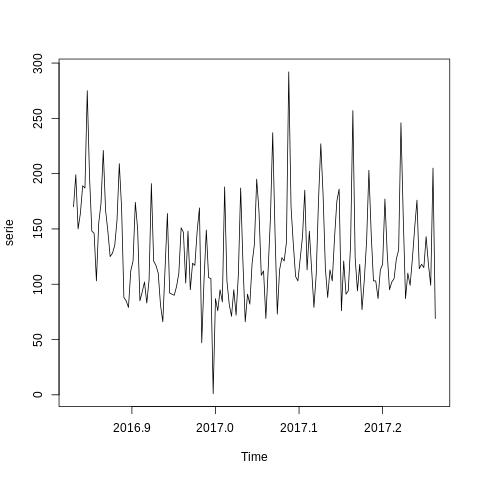

In [ ]:
%%R -i serieVentas

serie<-ts(serieVentas$counts,frequency=365,start=c(2016,304))
plot(serie)

In [ ]:
%%R
serie

Time Series:
Start = c(2016, 304) 
End = c(2017, 97) 
Frequency = 365 
  [1] 170 199 150 164 189 187 275 197 148 146 103 155 173 221 167 148 125 128
 [19] 135 158 209 169  88  85  79 112 121 174 150  85  93 102  83 104 191 121
 [37] 117 110  81  66 115 164  92  91  90  98 110 151 147 101 148  95 119 117
 [55] 148 169  47 104 149 106 105   1  87  76  95  84 188 103  82  71  95  72
 [73] 109 187 119  66  91  82 119 136 195 166 108 112  69 113 160 237 147  73
 [91] 113 124 121 138 292 170 136 107 103 123 143 185 113 148 113  79 109 176
[109] 227 181 114  88 113 103 142 175 186  76 121  91  94 135 257 124  94 118
[127]  77 104 139 203 146 103 103  87 113 118 177 128  95 102 105 123 131 246
[145] 161  87 110  99 123 151 176 114 118 115 143 118  99 205  69


# Clasificación de la serie

## Cambios en media

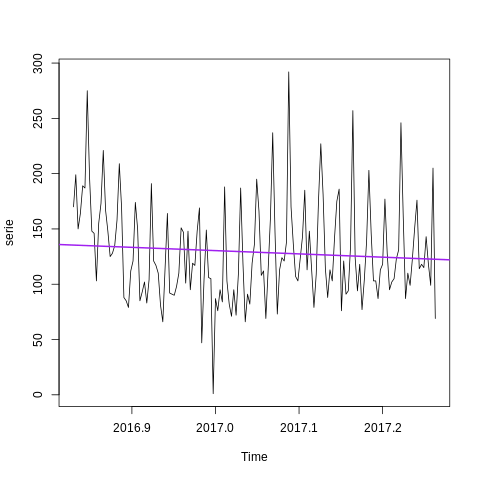

In [ ]:
%%R
lineal<-lm(serie~time(serie))
plot(serie)
abline(lineal,col="purple",lwd=2)

In [ ]:
%%R
summary(lineal)


Call:
lm(formula = serie ~ time(serie))

Residuals:
    Min      1Q  Median      3Q     Max 
-129.44  -30.64  -10.06   21.07  164.24 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 59928.33   57273.30   1.046    0.297
time(serie)   -29.65      28.39  -1.044    0.298

Residual standard error: 45.02 on 157 degrees of freedom
Multiple R-squared:  0.006896,	Adjusted R-squared:  0.0005703 
F-statistic:  1.09 on 1 and 157 DF,  p-value: 0.298



H0: La regresión no es significativa        
Ha: La regresión es significativa

- pvalor = 0.298

- alfa = 0.05

Como p-valor > alfa, no rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la regresión no es significativa





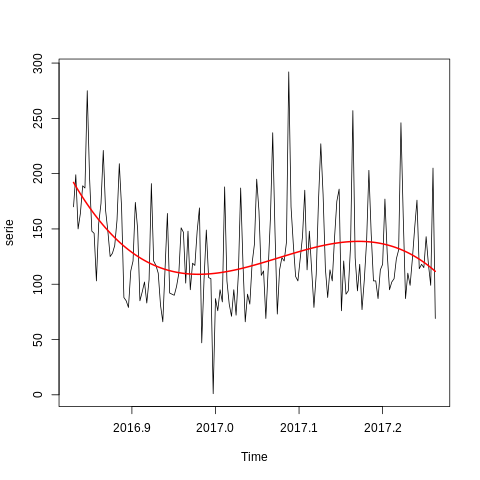

In [ ]:
%%R
cubico<-lm(serie~poly(as.numeric(time(serie)),degree=3))
plot(serie)
lines(as.numeric(time(serie)),fitted.values(cubico),col="red",lwd=2)

In [ ]:
%%R
summary(cubico)


Call:
lm(formula = serie ~ poly(as.numeric(time(serie)), degree = 3))

Residuals:
     Min       1Q   Median       3Q      Max 
-108.675  -25.393   -7.553   18.290  165.313 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                                 128.975      3.328  38.750  < 2e-16
poly(as.numeric(time(serie)), degree = 3)1  -47.009     41.969  -1.120 0.264410
poly(as.numeric(time(serie)), degree = 3)2  131.448     41.969   3.132 0.002076
poly(as.numeric(time(serie)), degree = 3)3 -167.205     41.969  -3.984 0.000104
                                              
(Intercept)                                ***
poly(as.numeric(time(serie)), degree = 3)1    
poly(as.numeric(time(serie)), degree = 3)2 ** 
poly(as.numeric(time(serie)), degree = 3)3 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 41.97 on 155 degrees of freedom
Multiple R-squared:  0.1481,	Adjusted R-squared:  

H0: La regresión no es significativa        
Ha: La regresión es significativa

- pvalor = 1.609e-05

- alfa = 0.05

Como p-valor < alfa, rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la regresión es significativa

<<< Como la serie presenta tendencia, no es estacionaria en media >>>

## Cambios en varianza

In [ ]:
%%R 
adf.test(serie,alternative="stationary")


	Augmented Dickey-Fuller Test

data:  serie
Dickey-Fuller = -3.8297, Lag order = 5, p-value = 0.01936
alternative hypothesis: stationary



H0: La serie no es estacionaria en varianza       
Ha: La serie es estacionaria en varianza

- pvalor = 0.01936

- alfa = 0.05

Como p-valor < alfa, rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la serie es estacionaria en varianza

## Clasificación de la serie: 

Serie no estacionaria por cambios en media

# Corrección de la serie

Para hacer la serie estacionaria, se hará una correción usando la función de diferenciación

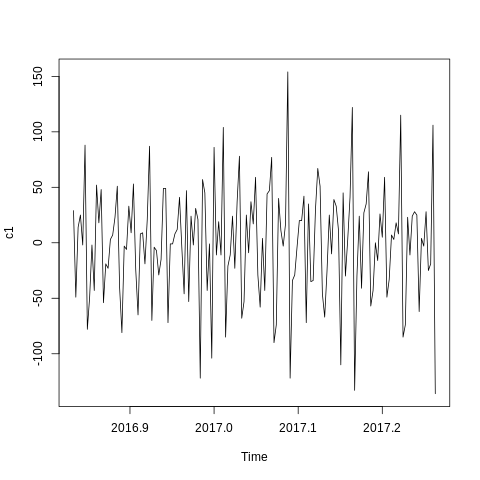

In [ ]:
%%R
c1<-diff(serie)
plot(c1)

## Cambios en media 


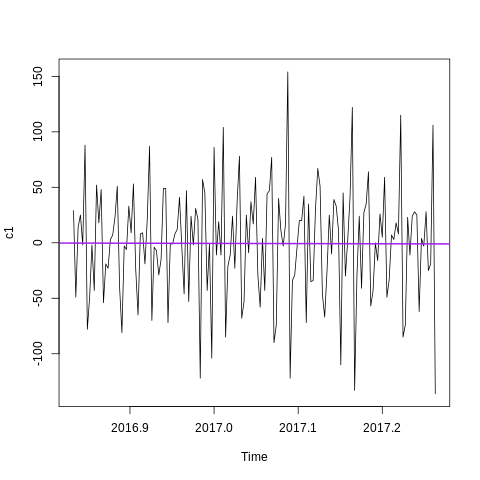

In [ ]:
%%R
lineal<-lm(c1~time(c1))
plot(c1)
abline(lineal,col="purple",lwd=2)

In [ ]:
%%R
summary(lineal)


Call:
lm(formula = c1 ~ time(c1))

Residuals:
     Min       1Q   Median       3Q      Max 
-135.001  -31.364    3.871   30.390  154.706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  3373.831  65555.913   0.051    0.959
time(c1)       -1.673     32.501  -0.051    0.959

Residual standard error: 51.05 on 156 degrees of freedom
Multiple R-squared:  1.698e-05,	Adjusted R-squared:  -0.006393 
F-statistic: 0.00265 on 1 and 156 DF,  p-value: 0.959



H0: La regresión no es significativa        
Ha: La regresión es significativa

- pvalor = 0.959

- alfa = 0.05

Como p-valor > alfa, no rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la regresión no es significativa

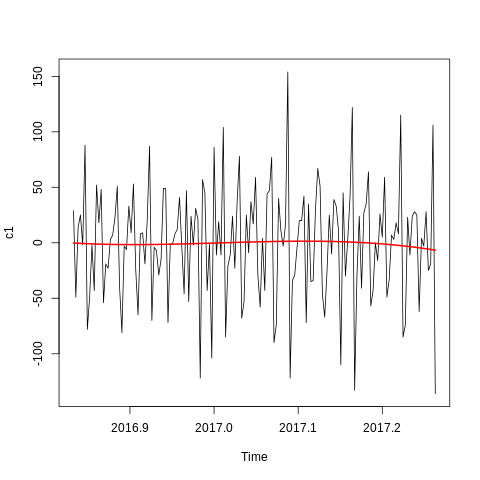

In [ ]:
%%R
cubico<-lm(c1~poly(as.numeric(time(c1)),degree=3))
plot(c1)
lines(as.numeric(time(c1)),fitted.values(cubico),col="red",lwd=2)

In [ ]:
%%R
summary(cubico)


Call:
lm(formula = c1 ~ poly(as.numeric(time(c1)), degree = 3))

Residuals:
     Min       1Q   Median       3Q      Max 
-133.506  -31.304    3.746   31.866  152.654 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                              -0.6392     4.0853  -0.156    0.876
poly(as.numeric(time(c1)), degree = 3)1  -2.6277    51.3508  -0.051    0.959
poly(as.numeric(time(c1)), degree = 3)2 -15.9848    51.3508  -0.311    0.756
poly(as.numeric(time(c1)), degree = 3)3 -14.1451    51.3508  -0.275    0.783

Residual standard error: 51.35 on 154 degrees of freedom
Multiple R-squared:  0.001138,	Adjusted R-squared:  -0.01832 
F-statistic: 0.05847 on 3 and 154 DF,  p-value: 0.9814



H0: La regresión no es significativa        
Ha: La regresión es significativa

- pvalor = 0.9814

- alfa = 0.05

Como p-valor > alfa, no rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la regresión no es significativa

La serie no presenta tendencia, serie estacionaria en media

## Cambios en varianza

In [ ]:
%%R 
adf.test(c1,alternative="stationary")


	Augmented Dickey-Fuller Test

data:  c1
Dickey-Fuller = -17.968, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary



H0: La serie no es estacionaria en varianza       
Ha: La serie es estacionaria en varianza

- pvalor = 0.01

- alfa = 0.05

Como p-valor < alfa, rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que la serie es estacionaria en varianza

## Clasificación de la serie
La serie es estacionaria

# Selección de modelo

In [ ]:
%%R

options(warns=-1)
min<-Inf

for(j in 0:9){
  
  for(i in 0:9){
    
    u<-AIC(arima(c1,order=c(j,0,i),method="ML"))
    
    if(u<min){
      min<-u
      pq<-c(j,i)
    }
  }
}

min
pq


[1] 7 9


Después de correr el ciclo, el mejor modelo para la corrección es un ARMA(7,9)

In [ ]:
%%R

mejor<-arima(c1,order=c(7,0,9),method="ML")


In [ ]:
%%R
AIC(mejor)

[1] 1548.688


# Ruido blanco

Para saber si se pueden hacer preddicciones con el modelo, se tiene que checar que se cumplan los supuestos de ruido blanco

In [ ]:
%%R

r<-residuals(mejor)

## Media cero

In [ ]:
%%R 

cat(mean(r))
cat("\n",mean(r)/var(r))


0.3803036
 0.0004988511

Como la media es cercana al cero, se puede decir que el supuesto de media cero se cumple

## Varianza constante

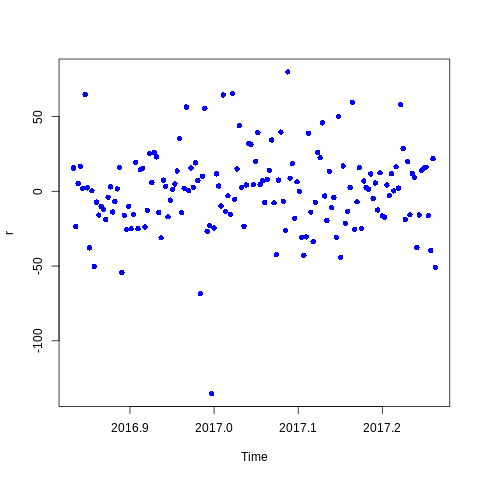

In [ ]:
%%R 

plot(r,type="p",col="blue",pch=16)

Como no se tienen patrones aparentes, el supuesto de varianza constante también se cumple

## Incorrelación 

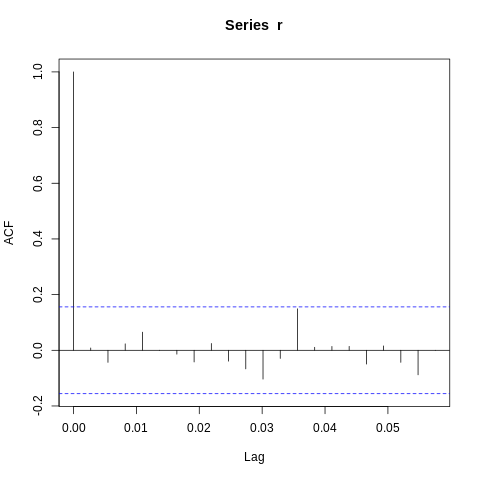

In [ ]:
%%R
acf(r)

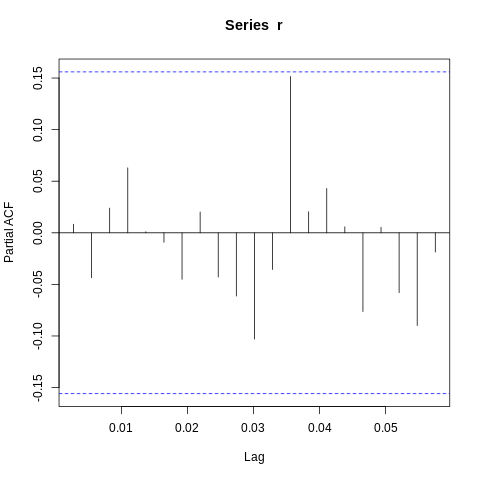

In [ ]:
%%R
pacf(r)

In [ ]:
%%R
Box.test(r)


	Box-Pierce test

data:  r
X-squared = 0.010958, df = 1, p-value = 0.9166



H0: Los datos son indpendientes      
Ha: Los datos son dependientes

- pvalor = 0.9166

- alfa = 0.05

Como p-valor > alfa, no rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que los residuales son independientes

Por lo tanto los datos cumplen con los supuestos de ruido blanco, es seguro hacer predicciones

## Normalidad

In [ ]:
%%R
shapiro.test(r)


	Shapiro-Wilk normality test

data:  r
W = 0.95442, p-value = 4.931e-05



H0: Los datos siguen una distribución normal      
Ha: Los datos siguen cualquier otra distribución

- pvalor = 4.931e-05

- alfa = 0.05

Como p-valor < alfa, rechazo H0 

Por lo tanto, con el 95% de confianza se tiene evidencia estadística para decir que los residuales no siguen una distribución normal

## Predicciones

In [ ]:
%%R
mejor.org<-arima(serie,order=c(7,1,9),method="ML")

In [ ]:
%%R 
pred<-predict(mejor.org,n.ahead=40)$pred
pred

Time Series:
Start = c(2017, 98) 
End = c(2017, 137) 
Frequency = 365 
 [1]  84.61183  90.72790 129.34268 125.91963 134.73970 172.64557  93.38820
 [8]  80.95521  79.49297 130.77910 126.00455 133.14208 166.37959  91.33507
[15]  80.44445  79.68894 136.92943 128.03998 132.32531 160.30797  89.93440
[22]  80.50137  80.39719 142.69425 129.69195 131.23902 154.01969  88.97218
[29]  80.99614  81.52564 147.99112 130.95041 129.90792 147.59793  88.45630
[36]  81.90003  83.02833 152.76813 131.82216 128.36423


La tabla arriba presentada serían el número de ventas esperados para los próximos 40 días, empezando el 5 de septiembre del 2017

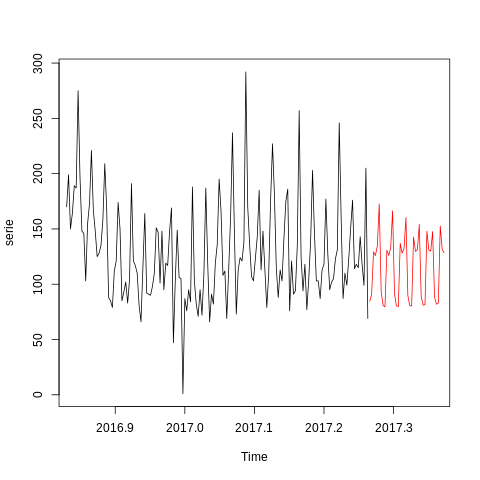

In [ ]:
%%R
plot(serie,xlim=c(2016.84,2017.36))
lines(pred,col="red")

# Conclusiones

Los resultados obtenidos son lor esperados para los objetivos que se tienen planteados, se logra ver de manera clara los  itemsets más repetitivos que se tienen en la panadería, así como se logró visualizar la tendencia que tiene  la serie de tiempo haciendo una media movil por semana.


Las técnicas utlilizadas permiten  hacer un cambio significativo en la panadería , y son las adecuadas para el tipo de datos que se encuentran en el registro.


 Como áreas de oportunidad, todavía se puede hacer un análisis especifico de los productos más importantes, así como explorar más el área para realizar predicciones.